# Q learning
- Sarsaの場合は、更新時に次の行動a(t+1)を求め、更新に使用していた。
- Q学習は状態st+1のうち、もっとも大きいものを更新に使用する。
- 更新が行動の決定方法に依存しないため、ランダム性が更新式に入らない分、Sarsaよりも学習の収束が早い。
- 更新式が変わるだけである。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/shinnosuke.yata/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


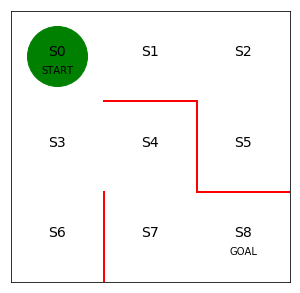

In [2]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定
# 方策　エージェントがどのように行動するかを決めたルール
# pi_theta(s, a)
# 状態sの時に行動aを採用する確率はパラメータthetaで決まる方策piに従う。

# 表形式表現　行が状態、列が行動aを示し、値はその行動を採用する確率
# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
# columns ========> [up    . right , down  , left  ]   # rows
theta_0 = np.array([[np.nan, 1     , 1     , np.nan],  # s0
                    [np.nan, 1     , np.nan, 1     ],  # s1
                    [np.nan, np.nan, 1     , 1     ],  # s2
                    [1     , 1     , 1     , np.nan],  # s3
                    [np.nan, np.nan, 1     , 1     ],  # s4
                    [1     , np.nan, np.nan, np.nan],  # s5
                    [1     , np.nan, np.nan, np.nan],  # s6
                    [1     , 1     , np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [16]:
# 方策パラメータtheta_0をランダム方策piに変換する関数の定義
def simple_convert_into_pi_from_theta(theta):
    
    i, j = theta.shape
    pi = np.zeros((i, j))
    for idx in range(i):
        pi[idx, :] = theta[idx, :] / np.nansum(theta[idx, :])
        
    pi = np.nan_to_num(pi)
    return pi

In [17]:
# 方策を定義
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [18]:
# 初期の行動価値関数Qを設定
i, j = theta_0.shape
Q = np.random.rand(i, j) * theta_0

In [21]:
# ε-greedy法を実装

def get_action(s, Q, epsilon, pi_0):
    direction = ["UP", "RIGHT", "DOWN", "LEFT"]
    # epsilon-greedy methods
    if np.random.rand() < epsilon:
        next_action = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_action = direction[argmax(Q[s, :])]
        
    if next_action == "UP":
        action = 0
    elif next_action == "RIGHT":
        action = 1
    elif next_action == "DOWN":
        action = 2
    elif next_action == "LEFT":
        action = 3
    
    return action

def get_s_next(s, a):
    
    direction = ["UP", "RIGHT", "DOWN", "LEFT"]
    next_action = direction[a]
    
    if next_action == "UP":
        s_next = s - 3
    elif next_action == "RIGHT":
        s_next = s + 1
    elif next_action == "DOWN":
        s_next = s + 3
    elif next_action == "LEFT":
        s_next = s - 1
        
    return s_next

In [23]:
# Q学習による行動価値関数Qの更新

def Q_learning(s, a, r, s_next, Q, eta, gamma):
    
    if s_next == 8:
        new_Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        new_Q[s, a] = Q[s, a] + eta * (r + gamma * nanmax(Q[s_next, :]) - Q[s, a])
    
    return new_Q

In [10]:
# Q学習で迷路を解く関数の定義、状態と行動の履歴および更新したQを出力


def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    pass

In [11]:
# Q学習で迷路を解く

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1


NameError: name 'Q' is not defined

In [ ]:
# 状態価値の変化を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm  # color map


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    # 各マスに状態価値の大きさに基づく色付きの四角を描画
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85)  # S8
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())